In [6]:
import numpy as np

import sys
sys.path.append('..')  # This moves one directory up

from neural_network.network import Network
from neural_network.layers import Dense
from neural_network.cost import Cost
from neural_network.optimizer import Optimizer

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

file_path = 'C:/GitHub/nn_from_scratch_python/data/housing.csv'
data = pd.read_csv(file_path)

data = data.dropna()
data = data.drop(columns=['longitude', 'latitude', 'ocean_proximity'])

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_Y = StandardScaler()
Y = scaler_Y.fit_transform(Y.reshape(-1, 1)).flatten()

In [8]:
network = Network(
    layers=[
        Dense(X.shape[1], 10, "relu"), 
        Dense(10, 10, "relu"), 
        Dense(10, 1, "none")
    ], 
    cost=Cost("MSE")
)

In [9]:
training_progress = network.train(X, Y, 15000, learning_rate=0.005, validation_split=0.2, verbose=True, verbose_percentage=10)

[--------------------] Progress: 0.0% - Epoch 0/15000 - Loss: 11.8737 - Validation Loss: 4.7960


[==------------------] Progress: 10.0% - Epoch 1500/15000 - Loss: 0.2908 - Validation Loss: 0.2952


[====----------------] Progress: 20.0% - Epoch 3000/15000 - Loss: 0.2502 - Validation Loss: 0.2534


[======--------------] Progress: 30.0% - Epoch 4500/15000 - Loss: 0.2325 - Validation Loss: 0.2343


[========------------] Progress: 40.0% - Epoch 6000/15000 - Loss: 0.2208 - Validation Loss: 0.2208


[==========----------] Progress: 50.0% - Epoch 7500/15000 - Loss: 0.2116 - Validation Loss: 0.2100


[============--------] Progress: 60.0% - Epoch 9000/15000 - Loss: 0.2050 - Validation Loss: 0.2028


[==============------] Progress: 70.0% - Epoch 10500/15000 - Loss: 0.2006 - Validation Loss: 0.1978


[================----] Progress: 80.0% - Epoch 12000/15000 - Loss: 0.1974 - Validation Loss: 0.1942


[==================--] Progress: 90.0% - Epoch 13500/15000 - Loss: 0.1948 - Validation Loss:

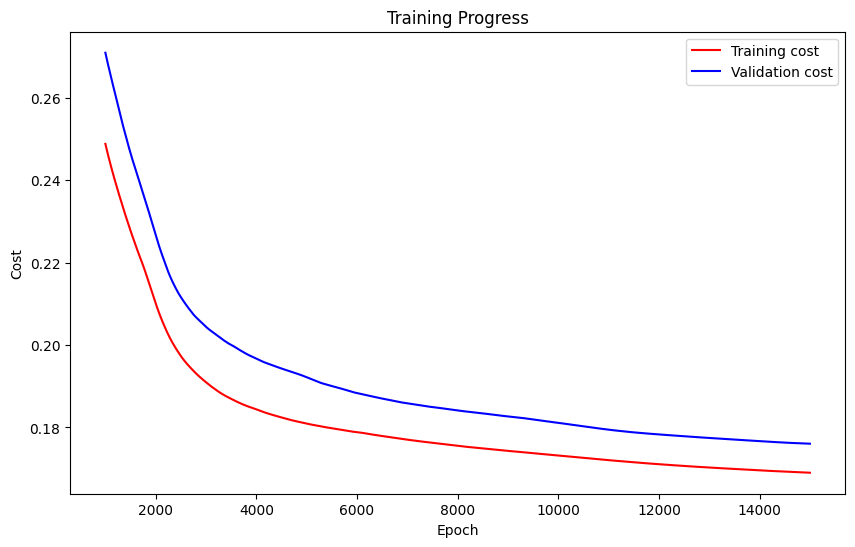

In [ ]:
import matplotlib.pyplot as plt

ignore_first_n = 1000

costs = training_progress['cost'][ignore_first_n:]
val_costs = training_progress['val_cost'][ignore_first_n:]

plt.figure(figsize=(10, 6))
plt.plot(range(ignore_first_n, len(costs) + ignore_first_n), costs, 'r-', label='Training cost')
plt.plot(range(ignore_first_n, len(val_costs) + ignore_first_n), val_costs, 'b-', label='Validation cost')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Progress')
plt.legend()
plt.show()